In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr


%store -r magnetic_data_ohe

In [3]:
estimators = magnetic_data_ohe.loc[:, magnetic_data_ohe.columns != 'Magnetic Moment']
predictors = magnetic_data_ohe.loc[:, magnetic_data_ohe.columns == 'Magnetic Moment']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(estimators, predictors, test_size=0.25, random_state=123456)
y_train = y_train.as_matrix(); y_test = y_test.as_matrix();
X_train = X_train.as_matrix(); X_test = X_test.as_matrix();

In [5]:
X_train.shape

(99, 7)

In [6]:
X_test.shape

(33, 7)

In [ ]:
#scaler = StandardScaler().fit(X_train)

#X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
#X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [4]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV

loocv = LeaveOneOut()

In [5]:
param_grid = {"n_estimators": [50, 100, 150],
    "max_depth": [3, None],
    "max_features": [1,2,3,4],
    "min_samples_split": [2, 4, 6, 8],
    "min_samples_leaf": [1, 3, 5, 10],
    "bootstrap": [True, False]}

model = RandomForestRegressor(random_state=123456) # oob_score = True doesn't work with GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, scoring = 'neg_mean_absolute_error')
grid.fit(X_train, y_train.ravel())

print(grid.best_score_)
print(grid.best_params_)

-0.566976430976
{'bootstrap': False, 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [6]:
rf_default = RandomForestRegressor(oob_score=True, random_state=123456)
results_default = rf_default.fit(X_train, y_train.ravel())

In [7]:
rf_optimized = RandomForestRegressor(n_estimators=150,bootstrap=True, max_depth=None, max_features= 4, min_samples_leaf = 1, min_samples_split = 2,oob_score=True, random_state=123456)
results_optimized = rf_optimized.fit(X_train, y_train.ravel())

In [8]:
rf_default.score(X_test, y_test)

0.92095940341262916

In [1]:
rf_oobT = RandomForestRegressor(oob_score=True, random_state=24601)
rf_oobF = RandomForestRegressor(oob_score=False, random_state=24601)

results_True = rf_oobT.fit(X_train, y_train.ravel())
results_False = rf_oobF.fit(X_train, y_train.ravel())

NameError: name 'RandomForestRegressor' is not defined

In [9]:
rf_optimized.score(X_test, y_test)

0.91167987669787054

In [ ]:
models = [0,1]
models = [rf_default, rf_optimized]

for list in models:
    cv_predict_test[list] = model_selection.cross_val_predict(models[list], X_train, y_train.ravel(), cv = loocv)


In [10]:
# Use me!
cv_predict = [0,1]
cv_predict[0] = model_selection.cross_val_predict(rf_default, X_train, y_train.ravel(), cv = loocv)
cv_predict[1] = model_selection.cross_val_predict(rf_optimized, X_train, y_train.ravel(), cv = loocv)

In [11]:
# Use me!
cv_score = [0,1]
cv_score[0] = model_selection.cross_val_score(rf_default, X_train, y_train.ravel(), cv = loocv, scoring = 'neg_mean_absolute_error')
cv_score[1] = model_selection.cross_val_score(rf_optimized, X_train, y_train.ravel(), cv = loocv, scoring = 'neg_mean_absolute_error')

In [12]:
cv_score[0].mean()

-0.43533838383838386

In [13]:
cv_score[1].mean()

-0.48124562556784822

In [14]:
cv_score[0].var()

0.25168472808897047

In [15]:
cv_score[1].var()

0.21425611739602995

In [16]:
cv_score[1]

array([ -1.72444444e-01,  -3.88000000e-01,  -2.71333333e-01,
        -4.13333333e-02,  -6.64800000e-01,  -4.21666667e-01,
        -3.06666667e-02,  -5.21500000e-01,  -6.46666667e-01,
        -2.06666667e-01,  -6.79866667e-01,  -2.61333333e-01,
        -1.53333333e-02,  -3.32666667e-01,  -1.31166667e-01,
        -2.64666667e-01,  -4.13333333e-02,  -5.72000000e-01,
        -4.97261905e-01,  -1.14716667e+00,  -4.18622222e-01,
        -8.88166667e-01,  -6.45777778e-02,  -4.70185185e-02,
        -4.07333333e-01,  -1.06783333e+00,  -2.91888889e-01,
        -1.10666667e-01,  -3.51666667e-01,  -4.96666667e-01,
        -8.35333333e-01,  -1.07290000e+00,  -2.59333333e-01,
        -1.00000000e-01,  -7.34000000e-01,  -1.47400000e+00,
        -1.51000000e-01,  -3.05333333e-01,  -8.02666667e-01,
        -1.00666667e-01,  -2.93000000e-01,  -1.24328889e+00,
        -5.17033333e-01,  -7.53333333e-02,  -2.65000000e-01,
        -5.98333333e-01,  -8.73333333e-01,  -2.62666667e-01,
        -2.71111111e-03,

In [28]:
output = [0,1]
output[0] = rf_default.predict(estimators)
output[1] = rf_optimized.predict(estimators)

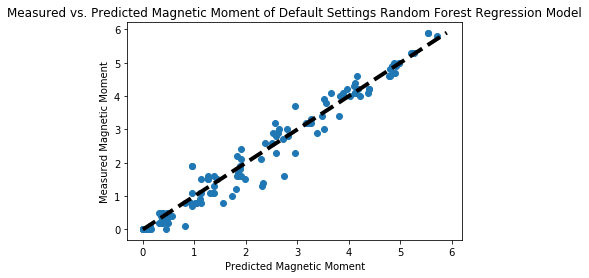

In [29]:
fig, ax = plt.subplots()
plt.scatter(x=output[0], y=predictors.as_matrix())
ax.plot([predictors.min(), predictors.max()], [predictors.min(), predictors.max()], 'k--', lw=4)

plt.title('Measured vs. Predicted Magnetic Moment of Default Settings Random Forest Regression Model')
ax.set_xlabel('Predicted Magnetic Moment')
ax.set_ylabel('Measured Magnetic Moment')
plt.show()


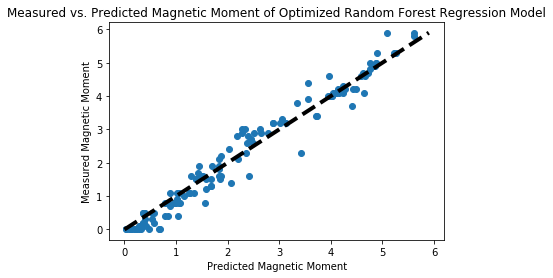

In [32]:
fig, ax = plt.subplots()
plt.scatter(x=output[1], y=predictors.as_matrix())
ax.plot([predictors.min(), predictors.max()], [predictors.min(), predictors.max()], 'k--', lw=4)

plt.title('Measured vs. Predicted Magnetic Moment of Optimized Random Forest Regression Model')
ax.set_xlabel('Predicted Magnetic Moment')
ax.set_ylabel('Measured Magnetic Moment')
plt.show()


In [ ]:
residual = Output.as_matrix() - final_model_output

fig, ax = plt.subplots()
plt.scatter(final_model_output, residual)
ax.plot([0, 6],[0, 0], 'k--', lw=4)

plt.title('Residual Error of Magnetic Moment of Multiple Linear Regression Model')
ax.set_xlabel('Predicted Magnetic Moment')
ax.set_ylabel('Residual Error')

predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)

test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

In [ ]:
rf_final = RandomForestRegressor(n_estimators=100,bootstrap=True, max_depth=None, max_features= 4, min_samples_leaf = 1, min_samples_split = 2,oob_score=True, random_state=123456)

results_final = rf_final.fit(Input, Output.as_matrix().ravel())
output_final = rf_final.predict(Input)
residual_final = Output.as_matrix() - output_final

In [ ]:
fig, ax = plt.subplots()
plt.scatter(x=Output.as_matrix(), y=output_final)
ax.plot([Output.min(), Output.max()], [Output.min(), Output.max()], 'k--', lw=4)

plt.title('Measured vs. Predicted Magnetic Moment of Optimized Random Forest Regression Model')
ax.set_xlabel('Predicted Magnetic Moment')
ax.set_ylabel('Measured Magnetic Moment')
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.scatter(output_final, residual_final)
ax.plot([0, 6],[0, 0], 'k--', lw=4)

plt.title('Residual Error of Magnetic Moment of Multiple Linear Regression Model')
ax.set_xlabel('Predicted Magnetic Moment')
ax.set_ylabel('Residual Error')